In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.nunique().to_frame("No of unique values")         

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [8]:
df['Region'].value_counts().sort_values()

North America                       2
Australia and New Zealand           2
Eastern Asia                        6
Southern Asia                       7
Southeastern Asia                   9
Middle East and Northern Africa    20
Western Europe                     21
Latin America and Caribbean        22
Central and Eastern Europe         29
Sub-Saharan Africa                 40
Name: Region, dtype: int64

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1.The counts of all data are same means no missing values.
2.The mean value is almost eual to median(50%) is almost all columns hence acts as normal distribution.
3.There is huge difference between 75% and max in happiness rank hence outliners are present

In [10]:
df['Happiness Score'].max()

7.587

In [11]:
df['Happiness Score'].min()

2.839

In [12]:
df['Happiness Score'].mean()

5.3757341772151905

In [13]:
df.loc[0]

Country                             Switzerland
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.587
Standard Error                          0.03411
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 0, dtype: object

In [14]:
df.loc[157]

Country                                        Togo
Region                           Sub-Saharan Africa
Happiness Rank                                  158
Happiness Score                               2.839
Standard Error                              0.06727
Economy (GDP per Capita)                    0.20868
Family                                      0.13995
Health (Life Expectancy)                    0.28443
Freedom                                     0.36453
Trust (Government Corruption)               0.10731
Generosity                                  0.16681
Dystopia Residual                           1.56726
Name: 157, dtype: object

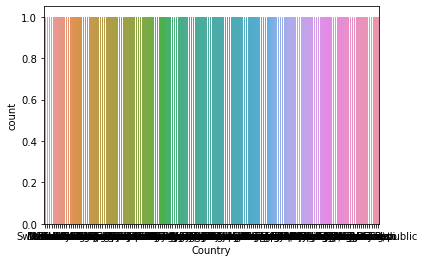

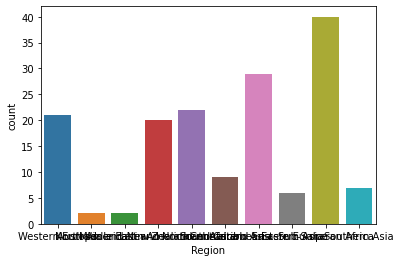

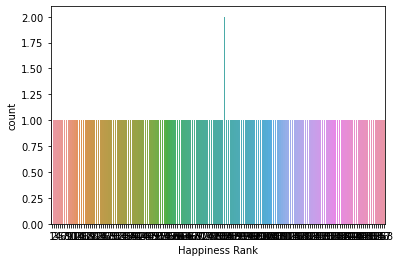

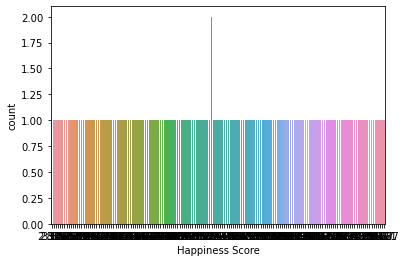

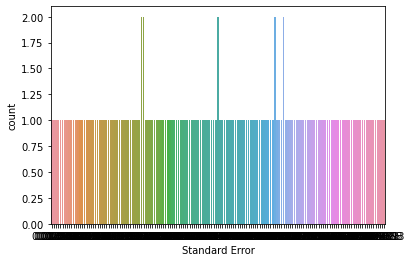

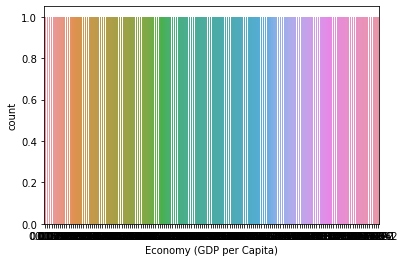

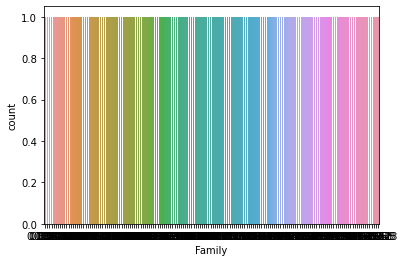

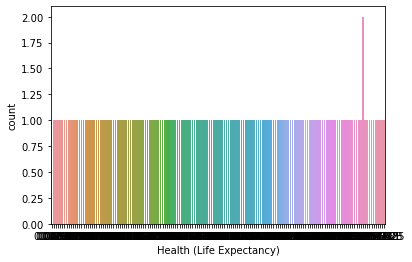

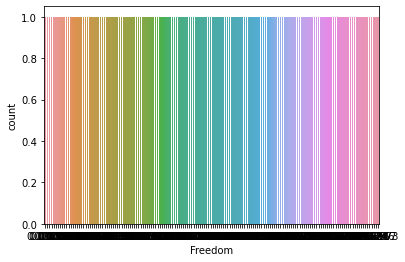

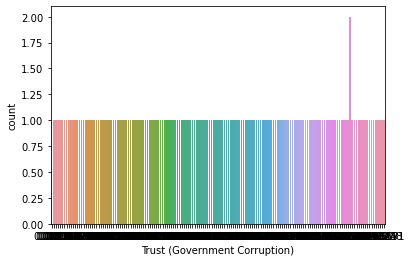

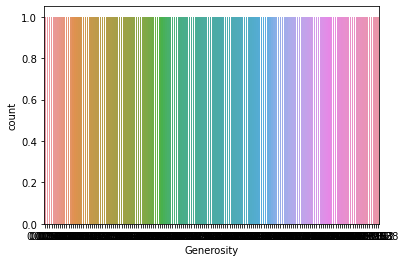

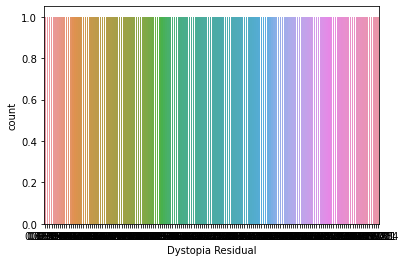

In [15]:
for i,col in enumerate(df.columns): #for univariate analysis
    plt.figure(i)
    sns.countplot(x=col,data=df)

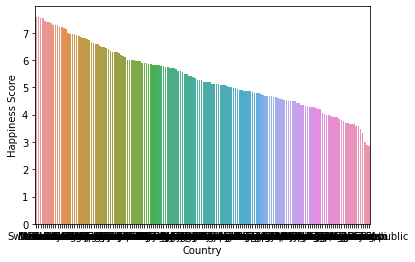

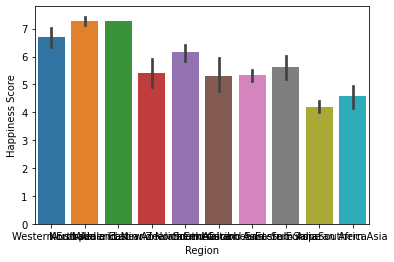

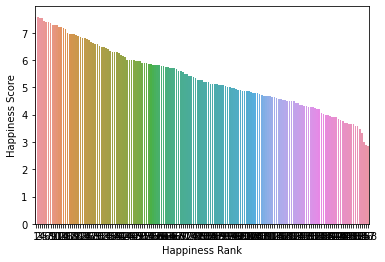

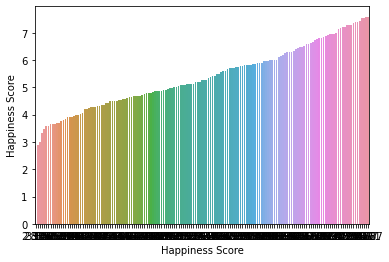

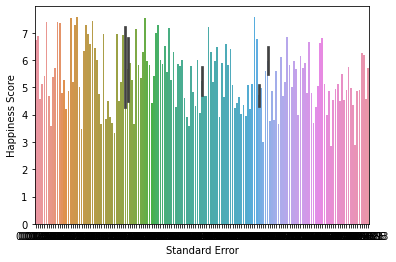

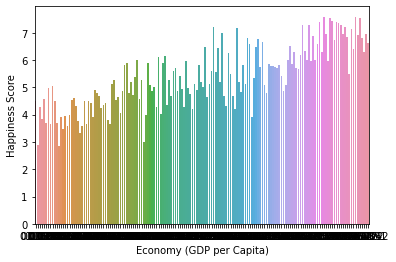

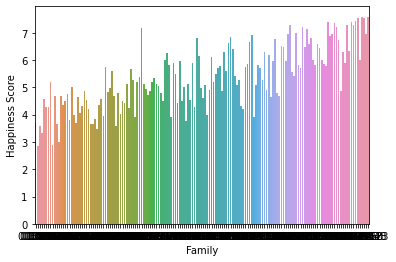

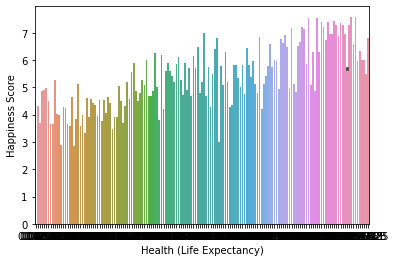

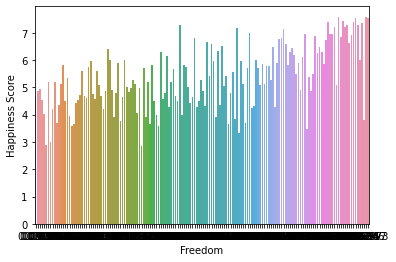

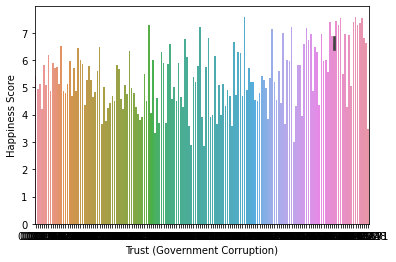

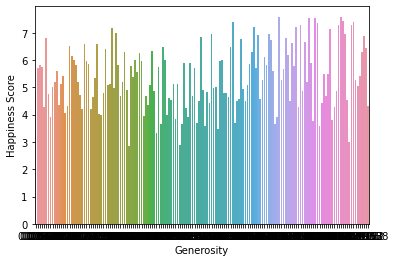

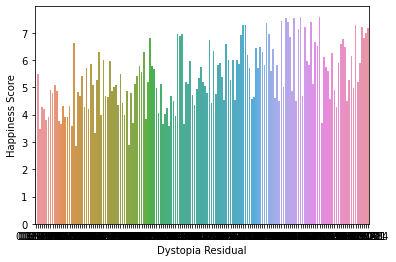

In [16]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.barplot(x=col ,y='Happiness Score',data=df)

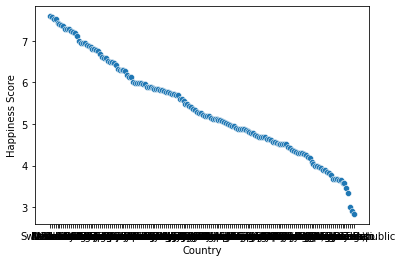

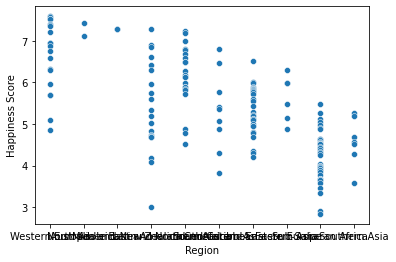

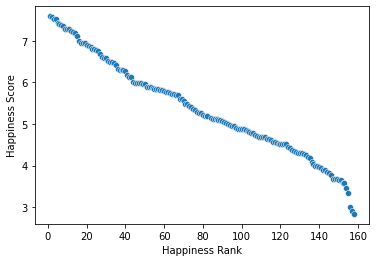

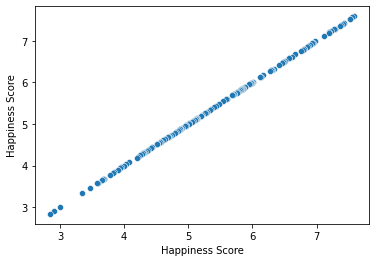

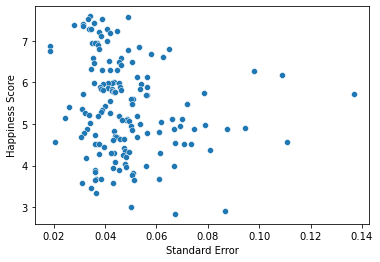

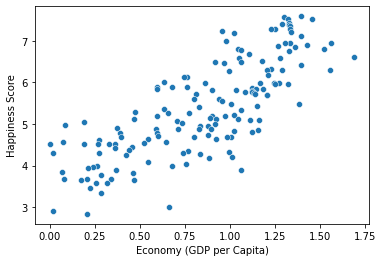

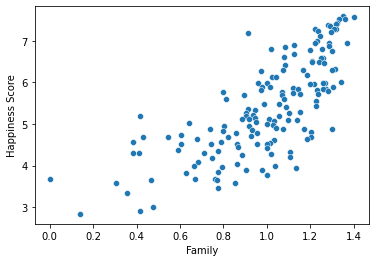

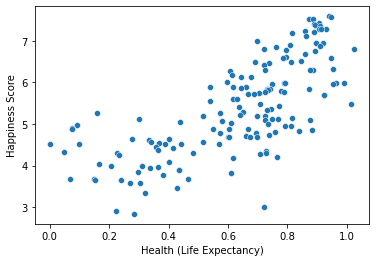

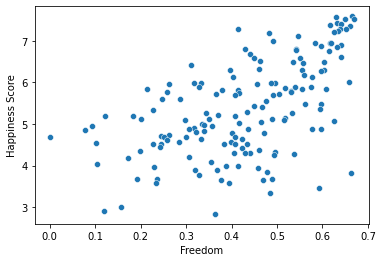

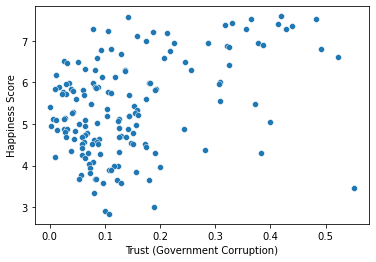

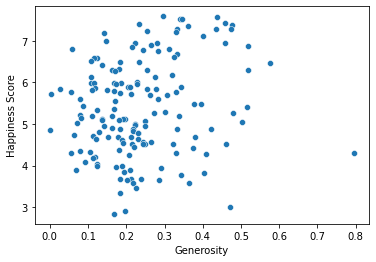

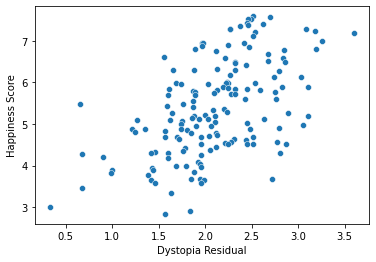

In [17]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.scatterplot(x=col ,y='Happiness Score',data=df)

In [18]:
df.drop('Country',axis=1,inplace=True)

In [19]:
df.replace({'Region':{'North America':0,'Australia and New Zealand':1,'Eastern Asia':2,'Southern Asia':3,'Southeastern Asia':4,'Middle East and Northern Africa':5,'Western Europe':6,'Latin America and Caribbean':7,'Central and Eastern Europe':8,'Sub-Saharan Africa':9}},inplace=True)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,6,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,6,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,6,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,6,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,9,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,9,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,5,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,9,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


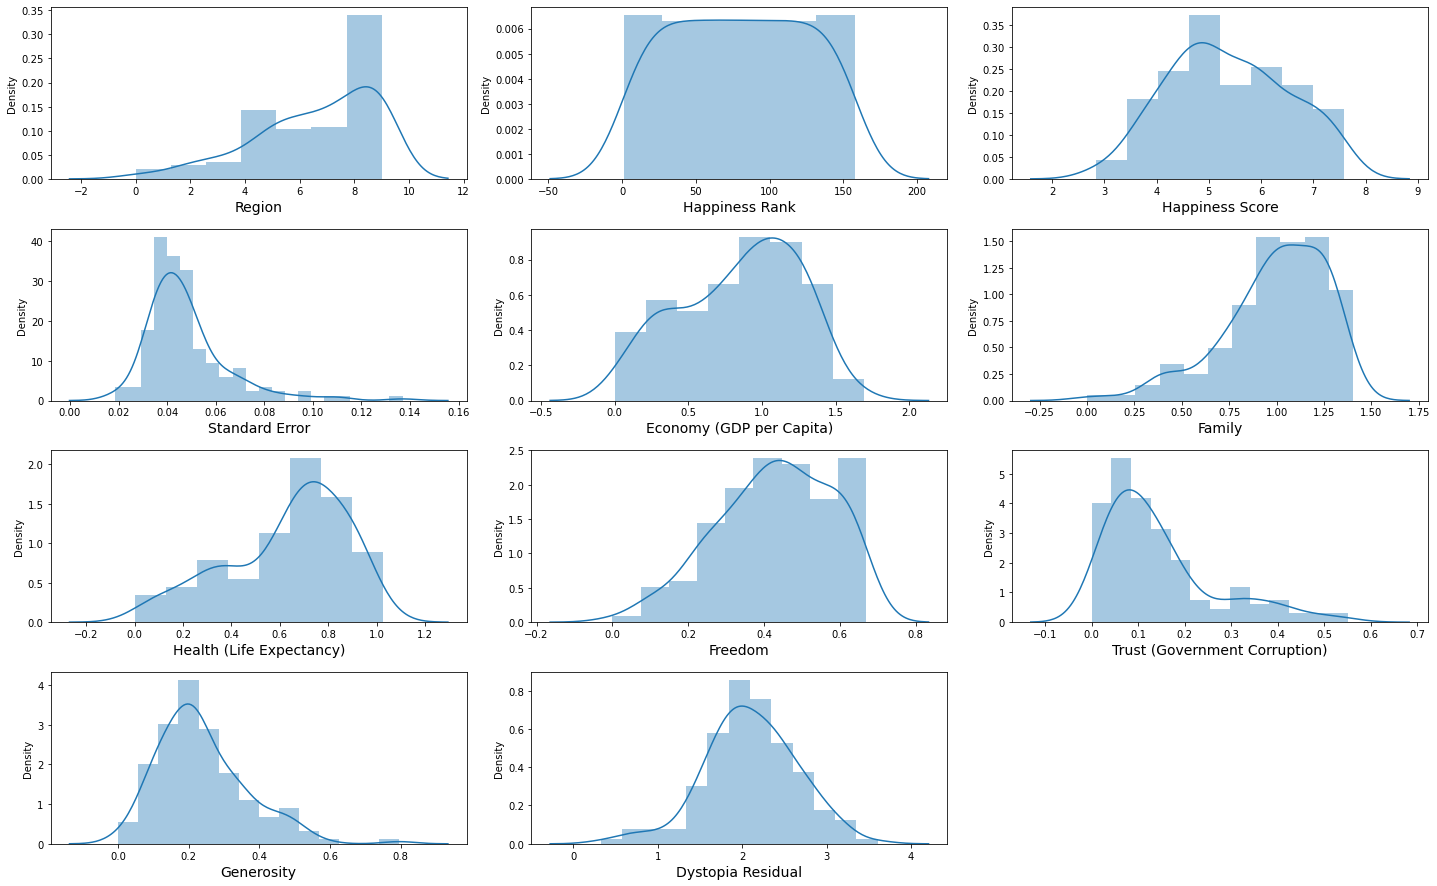

In [20]:
plt.figure(figsize=(20,15))
i=1
for y in df:
    if i<=16:
        ax=plt.subplot(5,3,i)
        sns.distplot(df[y])
        plt.xlabel(y,fontsize=14)
    i+=1
plt.tight_layout()

Region,Economy,Family,Health,Freedom and left skewed.
Trust,Generosity,Dystopia Residual are right skewed.

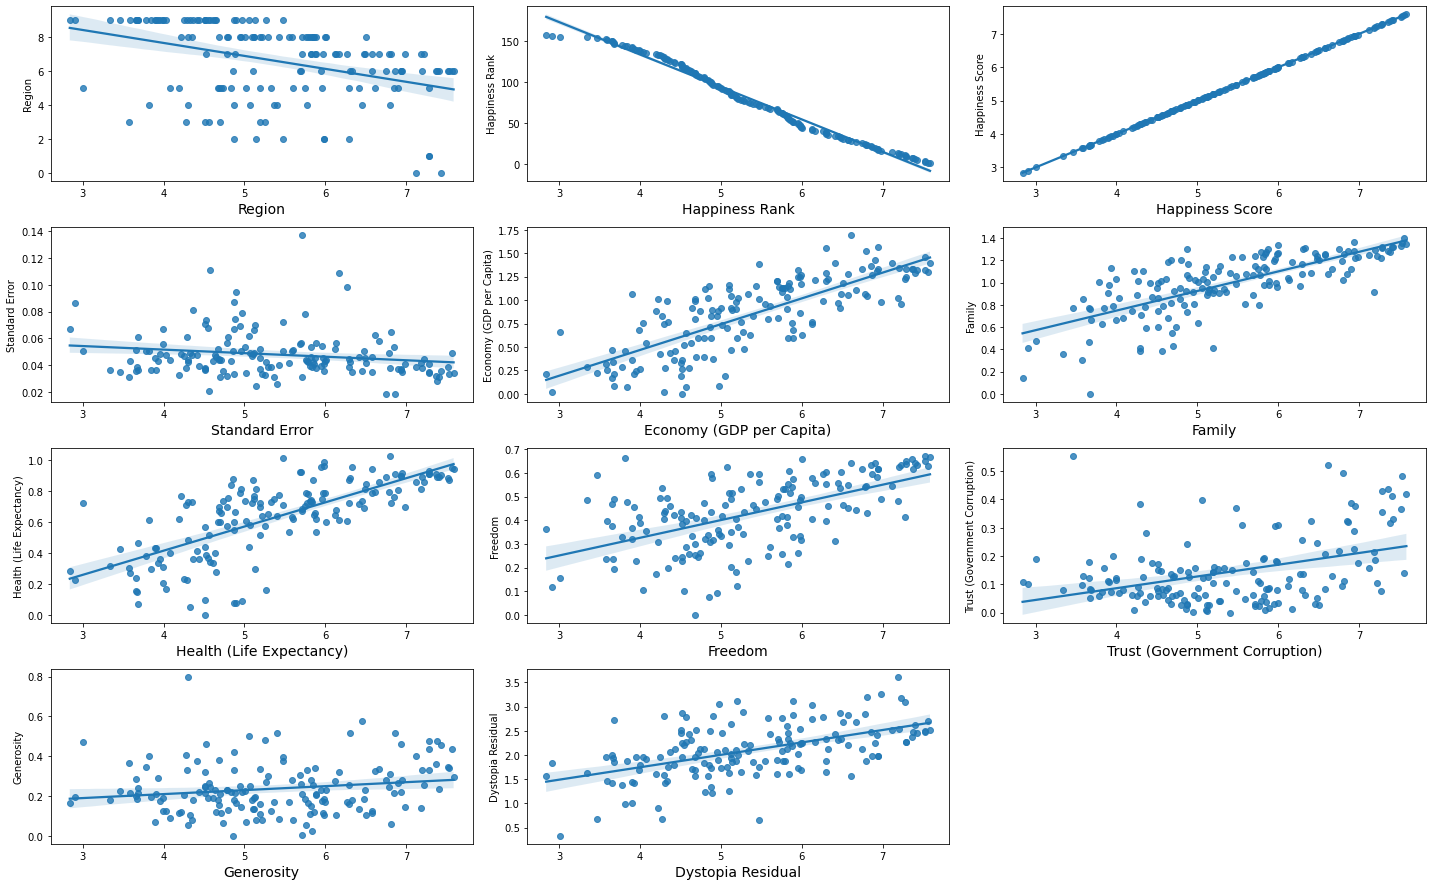

In [21]:
plt.figure(figsize=(20,15))
i=1
for y in df:
    if i<=16:
        ax=plt.subplot(5,3,i)
        sns.regplot(x='Happiness Score',y=y,data=df)
        plt.xlabel(y,fontsize=14)
    i+=1
plt.tight_layout()

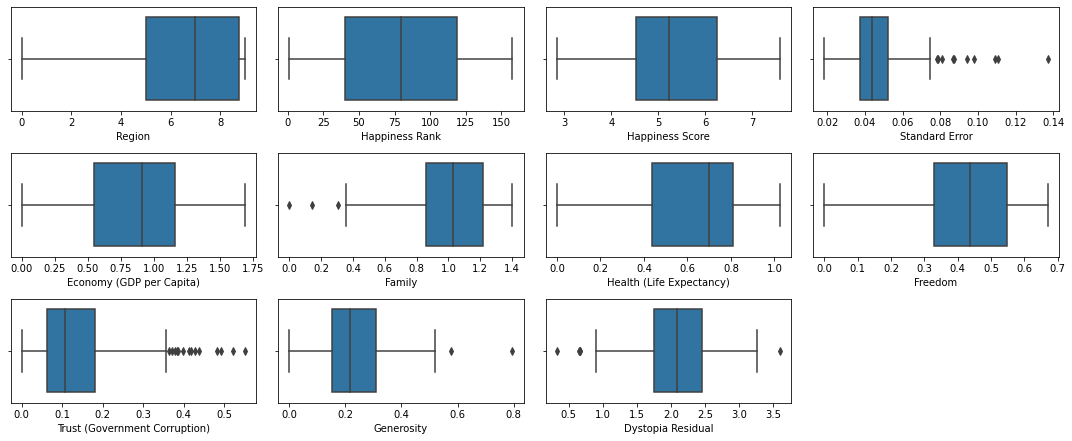

In [22]:
x=df.columns.values
plt.figure(figsize=(15,20))
for i in range(0,len(x)):
    plt.subplot(10,4,i+1)
    sns.boxplot(df[x[i]])
    plt.tight_layout()

Outliers are present in Family, Trust, Generoisty, Dystopia Residual,stanndard error

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64),
 array([8, 3, 3, 3, 9, 5, 8, 5], dtype=int64))

In [25]:
df1=df[(z<3).all(axis=1)]
df1.shape

(150, 11)

In [26]:
print("Old df: ", df.shape[0])
print("New df",df1.shape[0])

Old df:  158
New df 150


In [27]:
y=y[(z<3).all(axis=1)]
y.shape

(150,)

In [28]:
print("Data Loss Percentage: ", ((df.shape[0]-df1.shape[0])/df.shape[0]*100))

Data Loss Percentage:  5.063291139240507


In [29]:
df=df1
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]

In [30]:
df2.shape

(129, 11)

In [31]:
print("Data Loss Percentage: ", ((df.shape[0]-df2.shape[0])/df.shape[0]*100))

Data Loss Percentage:  14.000000000000002


Here we will use zscore method to remove outliers as data loss percentage is less here

In [32]:
df1.skew()

Region                          -0.846883
Happiness Rank                   0.003564
Happiness Score                  0.138125
Standard Error                   1.240644
Economy (GDP per Capita)        -0.381407
Family                          -0.798605
Health (Life Expectancy)        -0.755919
Freedom                         -0.391806
Trust (Government Corruption)    1.266162
Generosity                       0.644088
Dystopia Residual               -0.195486
dtype: float64

Skewness was much in Trust(Government Corruption) so we will remove that by using squareroot

In [33]:
df1['Trust (Government Corruption)']=np.sqrt(df1['Trust (Government Corruption)'])

In [34]:
df1.skew()

Region                          -0.846883
Happiness Rank                   0.003564
Happiness Score                  0.138125
Standard Error                   1.240644
Economy (GDP per Capita)        -0.381407
Family                          -0.798605
Health (Life Expectancy)        -0.755919
Freedom                         -0.391806
Trust (Government Corruption)    0.426161
Generosity                       0.644088
Dystopia Residual               -0.195486
dtype: float64

In [35]:
#Checking the correlation
corr=df.corr()
corr

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.378668,-0.377279,0.368471,-0.453177,-0.126538,-0.539419,-0.286132,-0.226452,-0.354785,0.054897
Happiness Rank,0.378668,1.000000,-0.992503,0.213120,-0.771117,-0.726820,-0.725110,-0.579923,-0.385700,-0.197437,-0.540269
Happiness Score,-0.377279,-0.992503,1.000000,-0.230613,0.768229,0.729256,0.712668,0.595397,0.411297,0.215231,0.548242
Standard Error,0.368471,0.213120,-0.230613,1.000000,-0.252418,-0.139711,-0.355582,-0.187750,-0.101828,-0.126499,0.037891
Economy (GDP per Capita),-0.453177,-0.771117,0.768229,-0.252418,1.000000,0.625960,0.815271,0.378551,0.266032,0.013637,0.037213
Family,-0.126538,-0.726820,0.729256,-0.139711,0.625960,1.000000,0.491530,0.487143,0.196532,0.122026,0.158048
Health (Life Expectancy),-0.539419,-0.725110,0.712668,-0.355582,0.815271,0.491530,1.000000,0.374351,0.196415,0.132065,0.022587
Freedom,-0.286132,-0.579923,0.595397,-0.187750,0.378551,0.487143,0.374351,1.000000,0.485669,0.395002,0.094951
Trust (Government Corruption),-0.226452,-0.385700,0.411297,-0.101828,0.266032,0.196532,0.196415,0.485669,1.000000,0.272805,0.082535
Generosity,-0.354785,-0.197437,0.215231,-0.126499,0.013637,0.122026,0.132065,0.395002,0.272805,1.000000,-0.076130


Gives a correlation between dependent and independent variable.Lets check by heatmap

<module 'matplotlib.pyplot' from 'C:\\Users\\Jaswinder kaur\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

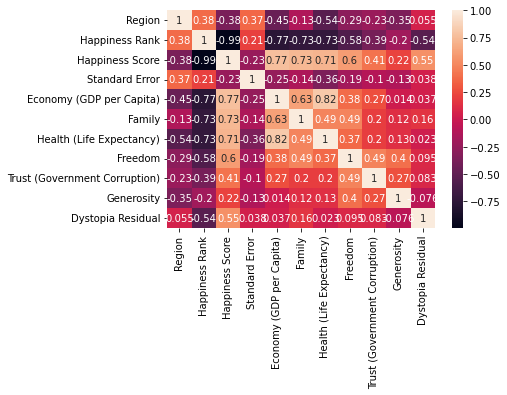

In [36]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt 

In [37]:
abs(corr['Happiness Score'].sort_values(ascending=False))

Happiness Score                  1.000000
Economy (GDP per Capita)         0.768229
Family                           0.729256
Health (Life Expectancy)         0.712668
Freedom                          0.595397
Dystopia Residual                0.548242
Trust (Government Corruption)    0.411297
Generosity                       0.215231
Standard Error                   0.230613
Region                           0.377279
Happiness Rank                   0.992503
Name: Happiness Score, dtype: float64

we see economy,family and health are highly correlated with happiness Score. I am considering Happiness Score as my target variable here since data revolves around it.

<function matplotlib.pyplot.show(close=None, block=None)>

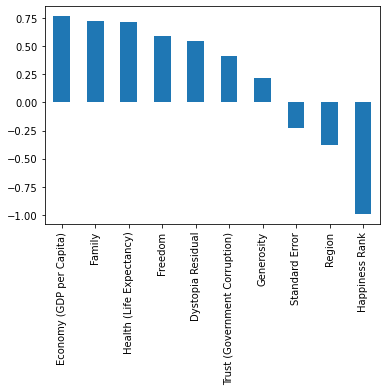

In [38]:
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar')
plt.show

We notice more positive corelation with economy,family,health,freedom,dystopia residual and less with Trust ,Generosity.
And negative correlation with standard error and region and hapiness rank

In [39]:
x = df1.drop(columns='Happiness Score', axis=1)
y = df1['Happiness Score']
print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)   #no of rows should be same in features and label

Feature Dimension (150, 10)
Label Dimension (150,)


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.251285,-1.713900,-0.871331,1.388762,1.356364,1.236779,1.584036,2.077992,0.527620,0.753453
1,-0.251285,-1.691682,0.184375,1.144569,1.563966,1.263008,1.341075,0.208229,1.683645,1.094020
2,-0.251285,-1.669464,-0.930818,1.204613,1.399956,0.963481,1.477147,2.404661,0.897247,0.706711
3,-0.251285,-1.647246,-0.535197,1.550771,1.283278,1.006732,1.611501,1.777191,0.943647,0.657405
4,-2.943628,-1.625028,-0.769559,1.206713,1.250437,1.090289,1.368804,1.570165,1.864357,0.632411
...,...,...,...,...,...,...,...,...,...,...
145,1.094886,1.641025,-0.216980,-1.562576,-0.603215,-1.505528,-0.202784,0.085228,-0.129521,-1.187868
146,-1.597457,1.663243,-1.105694,-1.402615,-2.765197,-1.374178,-1.264352,-0.234404,1.093701,-0.289257
147,1.094886,1.707679,-0.695739,-1.488610,-2.564329,-1.309731,0.388575,-0.432064,-0.418445,-0.877350
148,-0.700009,1.729897,0.278263,-0.512384,-2.087734,0.338608,-1.774703,0.612111,1.977706,-3.283988


To overcome biasness we used standard scaler.Now we will use VIF(variance inflation factor) to check multicollinearity in data 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.864989,Region
1,77.295407,Happiness Rank
2,1.262810,Standard Error
3,12.645397,Economy (GDP per Capita)
4,6.293541,Family
5,8.959378,Health (Life Expectancy)
6,3.150995,Freedom
7,1.835409,Trust (Government Corruption)
8,2.195067,Generosity
9,18.424076,Dystopia Residual


we see family is having largest vif we can drop this and check the vif again.I am not considering dropping family as more amount of data will be lost in the process.I had dropped country earlier now I will drop Region as well since it wont contribute much in my data and won't help in analysis

In [42]:
#x.drop("Family",axis=1,inplace=True)

In [43]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif=pd.DataFrame()
#vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
#vif["Features"]=x.columns
#vif    

In [44]:
df.drop('Region',axis=1,inplace=True)
df.drop('Happiness Rank',axis=1,inplace=True)
df.drop('Happiness Score',axis=1,inplace=True)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
maxAccu=0
maxRs=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Max r2 score is ",maxAccu,"on Random_state",maxRs)

Max r2 score is  0.9998346631919275 on Random_state 585


In [46]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=maxRs,test_size=0.25)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [48]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_LR))
print("r2_score on training data:",r2_score(y_test,pred_LR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_LR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_LR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_LR)))

r2_score: 0.9998346631919275
r2_score on training data: 99.98346631919274
Mean absolute error: 0.012188717871068852
mean_squared_error: 0.00019958949536989155
Root mean_squared_error 0.01412761463835603


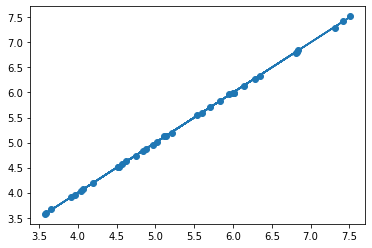

In [49]:
plt.figure
plt.scatter(x=pred_LR,y=y_test)
plt.plot(pred_LR,pred_LR)
plt.show()

In [50]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_RFR))
print("r2_score on training data:",r2_score(y_test,pred_RFR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_RFR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_RFR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.9981684845349803
r2_score on training data: 99.81684845349803
Mean absolute error: 0.03492289473684272
mean_squared_error: 0.0022109489815790224
Root mean_squared_error 0.047020729275278395


In [51]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("r2_score:",r2_score(y_test,pred_knn))
print("r2_score on training data:",r2_score(y_test,pred_knn)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print( "mean_squared_error:",mean_squared_error(y_test,pred_knn))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.925554026484057
r2_score on training data: 92.5554026484057
Mean absolute error: 0.2504684210526315
mean_squared_error: 0.08986888315789467
Root mean_squared_error 0.29978139228093303


In [52]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("r2_score:",r2_score(y_test,pred_GBR))
print("r2_score on training data:",r2_score(y_test,pred_GBR)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_GBR))
print( "mean_squared_error:",mean_squared_error(y_test,pred_GBR))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.9978662087618149
r2_score on training data: 99.78662087618149
Mean absolute error: 0.03018560438128524
mean_squared_error: 0.002575846972123098
Root mean_squared_error 0.050752802603630645


In [53]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("r2_score:",r2_score(y_test,pred_lasso))
print("r2_score on training data:",r2_score(y_test,pred_lasso)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_lasso))
print( "mean_squared_error:",mean_squared_error(y_test,pred_lasso))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.18363838579437097
r2_score on training data: 18.363838579437097
Mean absolute error: 0.8501813507169745
mean_squared_error: 0.985486562358197
Root mean_squared_error 0.9927167583748131


In [54]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("r2_score:",r2_score(y_test,pred_rd))
print("r2_score on training data:",r2_score(y_test,pred_rd)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print( "mean_squared_error:",mean_squared_error(y_test,pred_rd))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_rd)))

r2_score: 0.999567746219799
r2_score on training data: 99.9567746219799
Mean absolute error: 0.017537960672148797
mean_squared_error: 0.0005218034318420445
Root mean_squared_error 0.022843017135265747


In [55]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("r2_score:",r2_score(y_test,pred_svr))
print("r2_score on training data:",r2_score(y_test,pred_svr)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print( "mean_squared_error:",mean_squared_error(y_test,pred_svr))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score: 0.9490310273155612
r2_score on training data: 94.90310273155612
Mean absolute error: 0.1609121795131578
mean_squared_error: 0.06152817183423381
Root mean_squared_error 0.24804872874948142


In [56]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("r2_score:",r2_score(y_test,pred_etr))
print("r2_score on training data:",r2_score(y_test,pred_etr)*100)
print( "Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print( "mean_squared_error:",mean_squared_error(y_test,pred_etr))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score: 0.9978947194859622
r2_score on training data: 99.78947194859622
Mean absolute error: 0.033946315789474824
mean_squared_error: 0.002541429705263272
Root mean_squared_error 0.05041259470869627


In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.97511559 0.99027806 0.9771673  0.97588947 0.99706462]
0.983103010267893
Difference between R2 score and cross_val_score: 1.6731652924034446


In [59]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-4.20203798 -0.62180898 -0.1544958  -0.81343681 -2.46262272]
-1.6508804572548772
Difference between R2 score and cross_val_score: 264.9048941789857


In [60]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-8.16313695 -1.81724465 -1.03824721 -3.54269413 -4.53043869]
-3.818352324799406
Difference between R2 score and cross_val_score: 474.3906351283463


In [61]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[-3.50610152  0.08285602 -0.035161   -0.28900257 -2.08743415]
-1.1669686437904807
Difference between R2 score and cross_val_score: 216.48348525522954


In [62]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[-43.06259059  -6.3301873    0.17690786 -18.94837921 -24.89204709]
-18.611259265159994
Difference between R2 score and cross_val_score: 1879.4897650954365


In [63]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.89550824 0.96642956 0.97846313 0.94915624 0.98645926]
0.9552032865664426
Difference between R2 score and cross_val_score: 4.436445965335645


In [64]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_etr)-score6.mean())*100)

[-4.18492255  0.85470924  0.9291045   0.90806737 -2.27646338]
-0.7539009633306943
Difference between R2 score and cross_val_score: 175.17956828166567


In [65]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross_val_score:",(r2_score(y_test,pred_svr)-score7.mean())*100)

[-10.73315742   0.17276731   0.8853055   -0.46816014  -6.24800289]
-3.2782495269652627
Difference between R2 score and cross_val_score: 422.7280554280824


as diff btwn r2 score and cross val score is least in Linear Regression. It is the best fitting and performing model

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param={'alpha':[1.0,0.5,.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [68]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [69]:
Model=Ridge(alpha= 0.4,fit_intercept= True,positive= True, random_state= 1,solver= 'auto')

In [70]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 Score:",r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print( "mean_squared_error:",mean_squared_error(y_test,pred))
print("Root mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.9998219049953746
Mean Absolute Error: 0.012775311261248687
mean_squared_error: 0.00021499079675895913
Root mean_squared_error 0.014662564467341963


In [71]:
import joblib
import pickle
filename='Happiness.pkl'
pickle.dump(Model,open(filename,'wb'))

In [72]:
import pickle
loaded_model=pickle.load(open('Happiness.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.98219049953747


In [73]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Predicted,4.072611,6.00845,5.531605,4.744733,7.501435,7.307411,5.698498,4.975001,3.582503,5.951855,...,4.539149,3.961251,5.020823,3.595084,6.34986,4.521666,5.596598,4.57048,4.51151,4.847873
Original,4.077000,5.98700,5.548000,4.739000,7.522000,7.278000,5.716000,4.959000,3.575000,5.960000,...,4.518000,3.956000,5.007000,3.587000,6.32900,4.512000,5.589000,4.56500,4.51700,4.839000
